In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
# import itertools

In [46]:
posterior = np.load('../data/analysis/posterior_smoc.npy', allow_pickle=True).item()
params = np.load('../data/analysis/params_smoc.npy', allow_pickle=True).item()

In [47]:
river_sources = np.load('../river_sources.npy', allow_pickle=True).item()

In [48]:
time_range = pd.date_range('2018-01-01 12:00:00', '2019-10-23 12:00', freq='1d')

Text(0.4, 0.2, 'Current date: 2019-10-23 12:00:00')

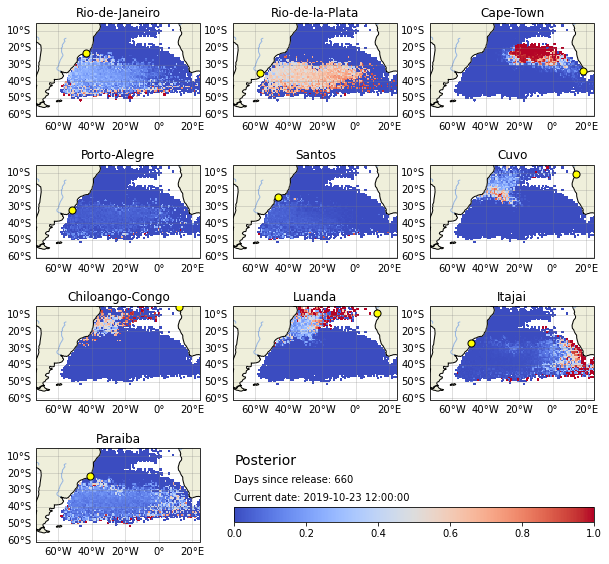

In [114]:
y,x = np.meshgrid(params['lat_range'], params['lon_range'])
t=660
labels=list(posterior.keys())

fig,ax = plt.subplots(ncols=3,nrows=4,figsize=(10,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})

ax = ax.reshape(12)

for k, loc in enumerate(labels):
    
    z = posterior[loc][t] #np.ma.masked_array(prob[loc][t], mask=prob['dimensions']['mask'])
    
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    #ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=1)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x,y,z,cmap='coolwarm', vmax=1)
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
               s=50, marker='o', color='yellow', edgecolors='k', zorder=3)
    
ax[-2].axis('off')
ax[-1].axis('off')
bar_ax = fig.add_axes([0.4, 0.17, 0.5, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal')
fig.text(0.4,0.25,'Posterior', fontsize=14)
fig.text(0.4,0.225,f'Days since release: {t:0.0f}')
fig.text(0.4,0.2,f'Current date: {time_range[t]}')


In [52]:
i_lon = 60
i_lat = 50

In [53]:
pd.DataFrame()

""


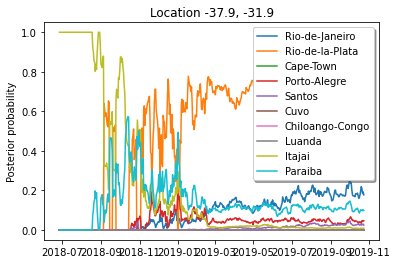

In [54]:
i_lon = 60
i_lat = 50
lat = params['lat_range'][i_lat]
lon = params['lon_range'][i_lat]

for loc in labels:
    plt.plot(time_range, posterior[loc][:, i_lon, i_lat], label=loc)
    #plt.plot(time_range, posterior['Rio-de-la-Plata'][:, i_lon, i_lat], label='La Plata', c='k')
plt.ylabel('Posterior probability')
plt.title(f'Location {lat:0.1f}, {lon:0.1f}')
plt.legend(shadow=True)

In [55]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

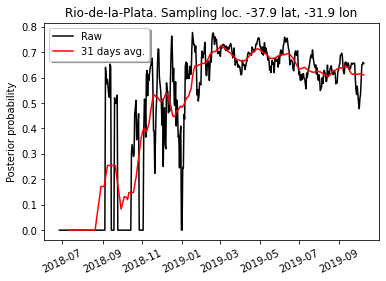

In [166]:
i_lon = 60
i_lat = 50
lat = params['lat_range'][i_lat]
lon = params['lon_range'][i_lat]
window = 31
loc = 'Rio-de-la-Plata'

og = posterior[loc][:, i_lon, i_lat]
avg = moving_average(posterior[loc][:, i_lon, i_lat], window)
index_slice = int((window-1)/2)
w_slice = slice(index_slice, -index_slice)

plt.plot(time_range[w_slice], og[w_slice], label='Raw', c='k')
plt.plot(time_range[w_slice], avg, label=f'{window} days avg.', c='r')
plt.xticks(rotation = 25)
plt.ylabel('Posterior probability')
plt.title(f'{loc}. Sampling loc. {lat:0.1f} lat, {lon:0.1f} lon')
plt.legend(shadow=True, )


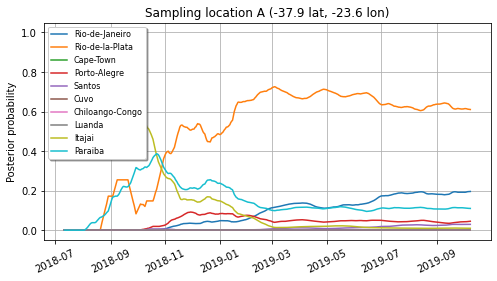

In [155]:
i_lon = 60
i_lat = 50
lat = params['lat_range'][i_lat]
lon = params['lon_range'][i_lon]
window = 31
index_slice = int((window-1)/2)
w_slice = slice(index_slice, -index_slice)

plt.figure(figsize=(8,4))
for loc in labels:
    avg = moving_average(posterior[loc][:, i_lon, i_lat], window)
    plt.plot(time_range[w_slice], avg, label=loc)

plt.xticks(rotation = 25)
plt.ylabel('Posterior probability')
plt.title(f'Sampling location A ({lat:0.1f} lat, {lon:0.1f} lon)')
plt.legend(shadow=True, fontsize=8, loc='upper left')
plt.grid()

In [146]:
params['lon_range'].shape

(120,)

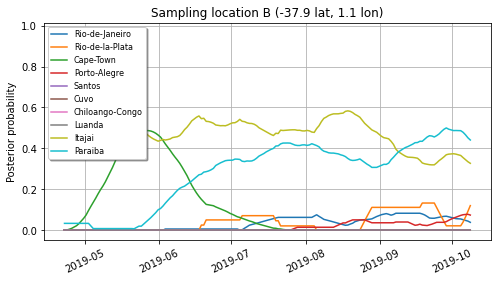

In [157]:
i_lon = 90
i_lat = 50
lat = params['lat_range'][i_lat]
lon = params['lon_range'][i_lon]
window = 31
index_slice = int((window-1)/2)
w_slice = slice(index_slice, -index_slice)

plt.figure(figsize=(8,4))
for loc in labels:
    avg = moving_average(posterior[loc][:, i_lon, i_lat], window)
    plt.plot(time_range[w_slice], avg, label=loc)

plt.xticks(rotation = 25)
plt.ylabel('Posterior probability')
plt.title(f'Sampling location B ({lat:0.1f} lat, {lon:0.1f} lon)')
plt.legend(shadow=True, fontsize=8, loc='upper left')
plt.grid()

Text(0.5, 1.0, 'Sampling location')

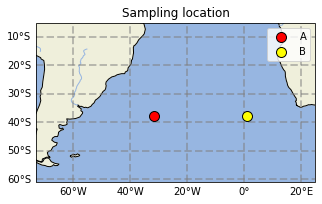

In [163]:
y,x = np.meshgrid(params['lat_range'], params['lon_range'])

fig,ax = plt.subplots(figsize=(5,5),
                      subplot_kw={'projection': ccrs.PlateCarree()})

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

loc = 'Rio-de-la-Plata'
t =660
ax.set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, zorder=1)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
    
#im = ax.pcolormesh(x,y,posterior[loc][t],cmap='viridis')
ax.scatter(params['lon_range'][50], params['lat_range'][i_lat], 
               s=100, marker='o', color='red', edgecolors='k', zorder=3, label = 'A')

ax.scatter(params['lon_range'][90], params['lat_range'][i_lat], 
               s=100, marker='o', color='yellow', edgecolors='k', zorder=3, label = 'B')


plt.legend()
ax.set_title('Sampling location')